<a href="https://colab.research.google.com/github/sabaakram539/SMS_Spam_classification/blob/main/SMS_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1. Business Understanding**
In our daily lives, we face many spam messages in our inboxes. I am going to download a spam data from the kaggle, will work on it and through this project we will develop a spam classification model that will tell us if the message is a spam.Let's dig in.

# **Phase 2. Data Understanding**

>> ## **Importing the dataset**

In [210]:
import pandas as pd
import numpy as np

In [211]:
data=pd.read_excel('spam.xlsx')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4910,ham,Love that holiday Monday feeling even if I hav...,NaN,NaN,NaN
756,ham,Cant think of anyone with * spare room off * t...,NaN,NaN,NaN
3781,ham,How r Ì_ going to send it to me?,NaN,NaN,NaN
3027,ham,You have got tallent but you are wasting.,NaN,NaN,NaN
2691,ham,Hey tmr meet at bugis 930 ?,NaN,NaN,NaN


In [212]:
data.shape

(5572, 5)

>> ## **Data Cleaning**

In [213]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [214]:
data.sample(5)

,v1,v2
3597,ham,"Aight, we'll head out in a few"
1116,ham,Hey... What time is your driving on fri? We go...
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...
4875,spam,lyricalladie(21/F) is inviting you to be her f...
4557,ham,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...


In [215]:
data.rename(columns={'v1':"target",'v2':'messages'},inplace=True)

In [216]:
data.head(2)

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [218]:
data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [219]:
data['target']=data.target.map({'spam':1,'ham':0})

In [220]:
data.head(2)

,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [221]:
data.isnull().sum()

target      0
messages    0
dtype: int64

In [222]:
data.duplicated().sum()

403

In [223]:
data=data.drop_duplicates(keep='first')

In [224]:
data.shape

(5169, 2)

>> ## **Exploratory Data Analysis**

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    5169 non-null   int64 
 1   messages  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [226]:
data['messages']=data['messages'].astype(str)

In [227]:
data.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [228]:
import matplotlib.pyplot as plt

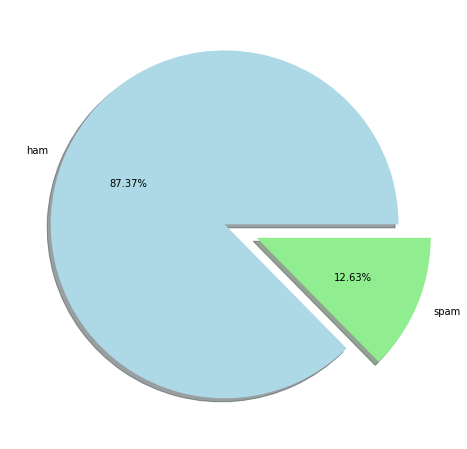

In [229]:
plt.figure(figsize=(20,8))
plt.pie(data.target.value_counts(),labels=['ham','spam'],autopct="%1.2f%%",shadow=True,explode=[0,0.20],colors=["lightblue","lightgreen"])
plt.show()

In [230]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [231]:
print(len(data['messages'][2]))

155


In [232]:
data['total_characters']=data['messages'].apply(lambda x: len(x))

In [233]:
data.head()

,target,messages,total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [234]:
data['total_words']=data['messages'].apply(lambda x: len(nltk.word_tokenize(x)))

In [235]:
data.head()

,target,messages,total_characters,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [236]:
data['total_sentences']=data['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [237]:
data.head()

,target,messages,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [238]:
data[['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [239]:
data[data['target']==1][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [240]:
data[data['target']==0][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [241]:
import seaborn as sns

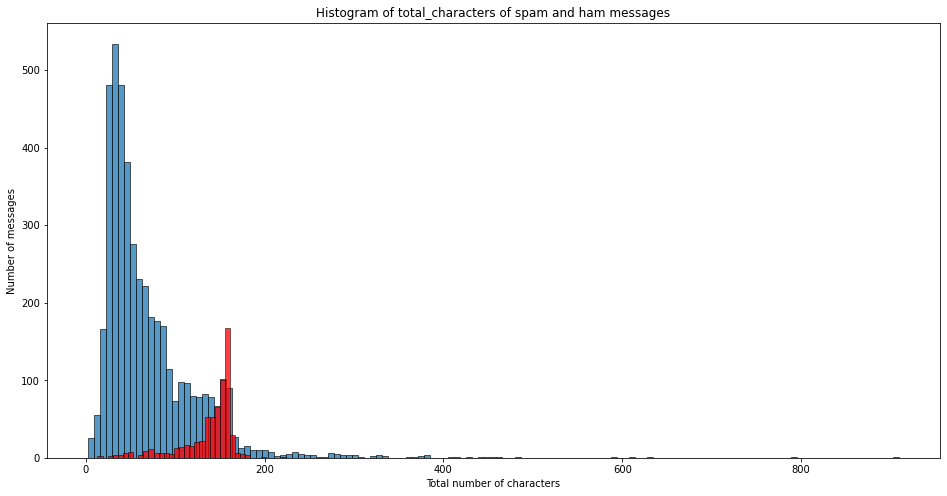

In [242]:
plt.figure(figsize=(16,8))
plt.xlabel('Total number of characters')
plt.ylabel('Number of messages')
plt.title('Histogram of total_characters of spam and ham messages')
sns.histplot(data[data['target']==0]['total_characters'])
sns.histplot(data[data['target']==1]['total_characters'],color='red')
plt.show()

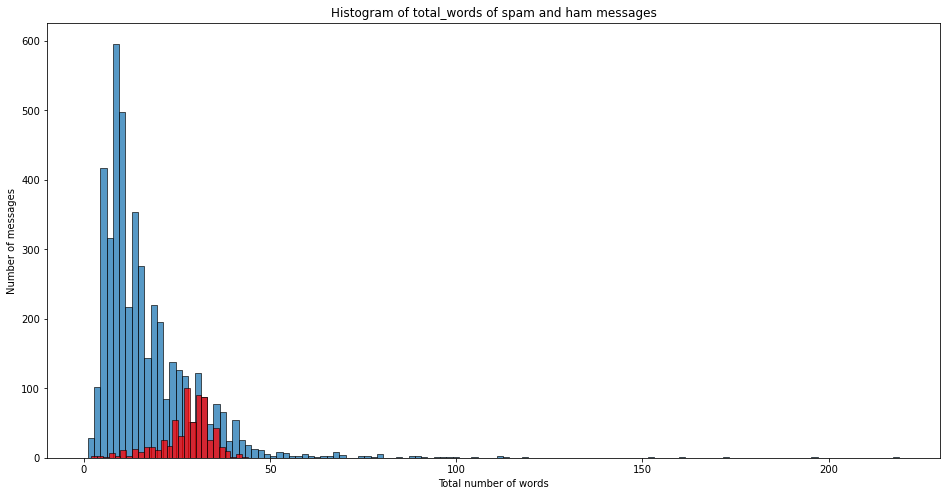

In [243]:
plt.figure(figsize=(16,8))
plt.xlabel('Total number of words')
plt.ylabel('Number of messages')
plt.title('Histogram of total_words of spam and ham messages')
sns.histplot(data[data['target']==0]['total_words'])
sns.histplot(data[data['target']==1]['total_words'],color='red')
plt.show()

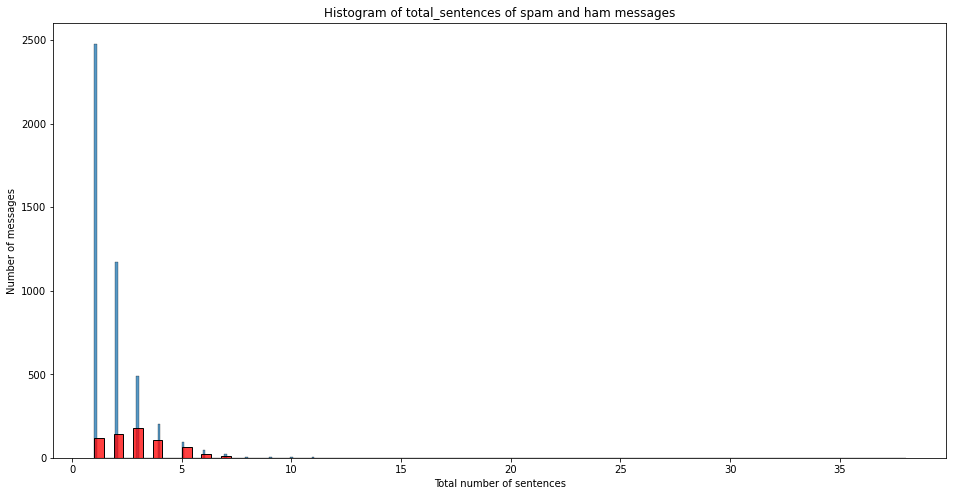

In [244]:
plt.figure(figsize=(16,8))
plt.xlabel('Total number of sentences')
plt.ylabel('Number of messages')
plt.title('Histogram of total_sentences of spam and ham messages')
sns.histplot(data[data['target']==0]['total_sentences'])
sns.histplot(data[data['target']==1]['total_sentences'],color='red')
plt.show()

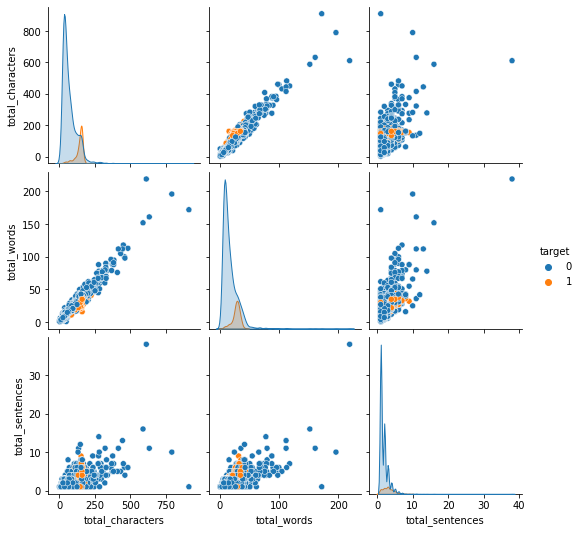

In [245]:
sns.pairplot(data,hue='target')

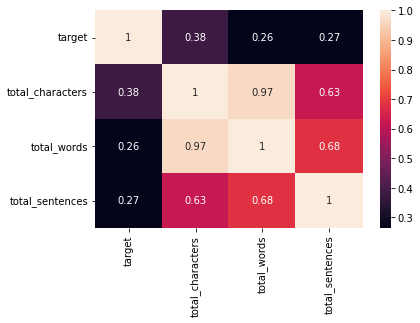

In [246]:
sns.heatmap(data.corr(),annot=True)

# **Phase 3. Data Processing**

In [247]:
data.head()

,target,messages,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Five things need to be done.
* lower case
* tockenization
* Removing Special characters
* Removing stop words and punctuation
* stemming


In [248]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [249]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [250]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [251]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [252]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [253]:
data['transformed_messages']=data['messages'].apply(lambda x: transform_text(x))

In [254]:
data.head()

,target,messages,total_characters,total_words,total_sentences,transformed_messages
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [255]:
from wordcloud import WordCloud

In [256]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [257]:
spam_wc=wc.generate(data[data['target']==1]['transformed_messages'].str.cat(sep=" "))

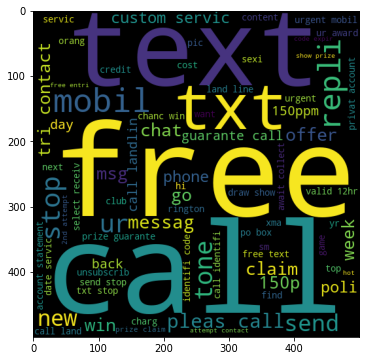

In [258]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

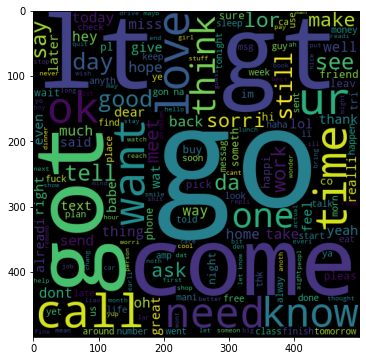

In [259]:
ham_wc=wc.generate(data[data['target']==0]['transformed_messages'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [260]:
data.head()

,target,messages,total_characters,total_words,total_sentences,transformed_messages
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [261]:
spam_corpus=[]
for messages in data[data['target']==1]['transformed_messages'].tolist():
  for word in messages.split():
    spam_corpus.append(word)

In [262]:
len(spam_corpus)

9883

In [263]:
from collections import Counter

In [264]:
spam_words=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [265]:
spam_words.head()

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122


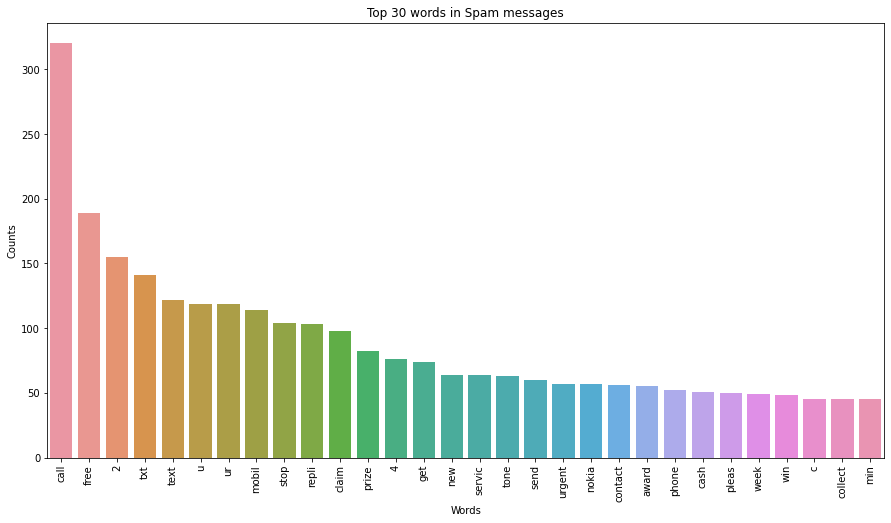

In [266]:
plt.figure(figsize=(15,8))
sns.barplot(x=spam_words[0],y=spam_words[1])
plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Top 30 words in Spam messages")
plt.xticks(rotation='vertical')
plt.show()

In [267]:
ham_corpus=[]
for message in data[data['target']==0]['transformed_messages'].tolist():
  for word in message.split():
    ham_corpus.append(word)

In [268]:
len(ham_corpus)

34771

In [269]:
ham_words=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [270]:
ham_words.head()

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287


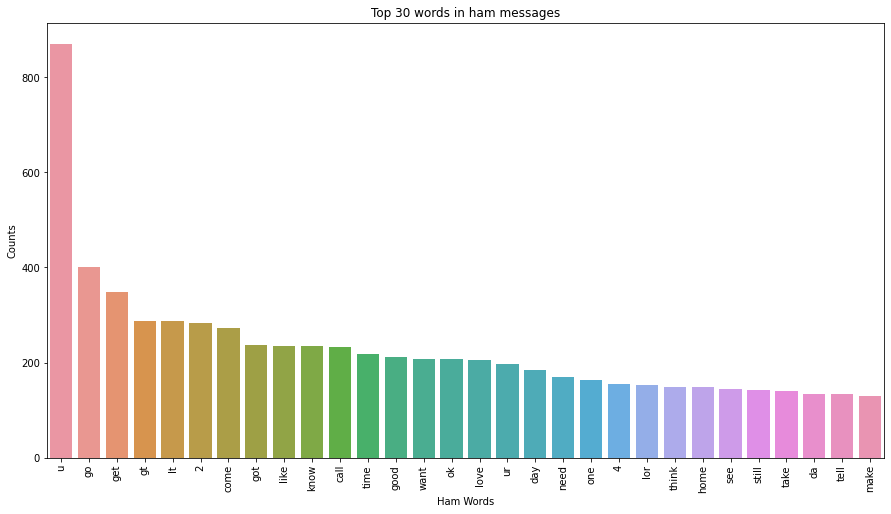

In [271]:
plt.figure(figsize=(15,8))
sns.barplot(x=ham_words[0],y=ham_words[1])
plt.xlabel("Ham Words")
plt.ylabel("Counts")
plt.title("Top 30 words in ham messages")
plt.xticks(rotation='vertical')
plt.show()

# **Phase 4. Model Building**

>> ## **Text Vectorization : Count Vectorizer**

In [272]:
from sklearn.feature_extraction.text import CountVectorizer

In [273]:
cv=CountVectorizer()

In [274]:
x=cv.fit_transform(data['transformed_messages']).toarray()
y=data['target'].values

In [275]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [276]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [277]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [278]:
gnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [279]:
y_pred_gnb=gnb.predict(x_test)
y_pred_bnb=bnb.predict(x_test)
y_pred_mnb=mnb.predict(x_test)

In [280]:
print("Gaussian Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score : ",precision_score(y_test,y_pred_gnb))

Gaussian Naive Bayes

Accuracy Score :  0.874274661508704
Confusion Matrix : 
 [[786 110]
 [ 20 118]]
Precision Score :  0.5175438596491229


In [281]:
print("Bernoulli Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score : ",precision_score(y_test,y_pred_bnb))

Bernoulli Naive Bayes

Accuracy Score :  0.9709864603481625
Confusion Matrix : 
 [[893   3]
 [ 27 111]]
Precision Score :  0.9736842105263158


In [282]:
print("Multinomial Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score : ",precision_score(y_test,y_pred_mnb))

Multinomial Naive Bayes

Accuracy Score :  0.965183752417795
Confusion Matrix : 
 [[872  24]
 [ 12 126]]
Precision Score :  0.84


>> ## **Text Vectorization : Tfidf Vectorizer**

In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [284]:
tfidf=TfidfVectorizer()

In [285]:
x=tfidf.fit_transform(data['transformed_messages']).toarray()
y=data['target'].values

In [286]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [287]:
gnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [288]:
y_pred_gnb=gnb.predict(x_test)
y_pred_bnb=bnb.predict(x_test)
y_pred_mnb=mnb.predict(x_test)

In [289]:
print("Gaussian Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score : ",precision_score(y_test,y_pred_gnb))

Gaussian Naive Bayes

Accuracy Score :  0.8704061895551257
Confusion Matrix : 
 [[787 109]
 [ 25 113]]
Precision Score :  0.509009009009009


In [290]:
print("Bernoulli Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score : ",precision_score(y_test,y_pred_bnb))

Bernoulli Naive Bayes

Accuracy Score :  0.9709864603481625
Confusion Matrix : 
 [[893   3]
 [ 27 111]]
Precision Score :  0.9736842105263158


In [291]:
print("Multinomial Naive Bayes\n")

print("Accuracy Score : ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score : ",precision_score(y_test,y_pred_mnb))

Multinomial Naive Bayes

Accuracy Score :  0.9593810444874274
Confusion Matrix : 
 [[896   0]
 [ 42  96]]
Precision Score :  1.0


We have more tfidf vectorized mnb naive bayes as the most precise.

Now we will try other models too and compare their accuracy

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [293]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
knn=KNeighborsClassifier()
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc=XGBClassifier(n_estimators=50,random_state=2)
svc=SVC(kernel='sigmoid',gamma=1.0)

In [294]:
clfs={
    'Logistic Regression':lrc,
    'KNeighbors':knn,
    'Gaussian Naive Bayes':gnb,
    'Bernoulli Naive Bayes':bnb,
    'Multinomial Naive Bayes':mnb,
    'Decision Tree':dtc,
    'Random Forest':rfc,
    'Extra Trees':etc,
    'Adaboost':abc,
    'Bagging':bc,
    'Gradient Boosting':gbc,
    'XGB Classifier':xgbc,
    'Support Vector':svc
}

In [295]:
def result(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy, precision

In [296]:
result(lrc,x_train,y_train,x_test,y_test)

(0.9526112185686654, 0.9320388349514563)

In [297]:
accuracy_scores=[]
precision_scores=[]
for name, clf in clfs.items():
  current_accuracy,current_precision=result(clf,x_train,y_train,x_test,y_test)
  #print('For',name)
  #print("Accuracy : ",current_accuracy)
  #print("Precision : ",current_precision,'\n')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [298]:
result1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,}).sort_values('Precision',ascending=False)

In [299]:
result1

,Algorithm,Accuracy,Precision
1,KNeighbors,0.900387,1.000000
4,Multinomial Naive Bayes,0.959381,1.000000
6,Random Forest,0.976789,0.991379
7,Extra Trees,0.975822,0.974790
3,Bernoulli Naive Bayes,0.970986,0.973684
12,Support Vector,0.972921,0.966102
0,Logistic Regression,0.952611,0.932039
8,Adaboost,0.961315,0.929825
11,XGB Classifier,0.950677,0.914286
10,Gradient Boosting,0.951644,0.892857


In [300]:
result1_melt=pd.melt(result_table,id_vars='Algorithm')

<Figure size 1440x864 with 0 Axes>

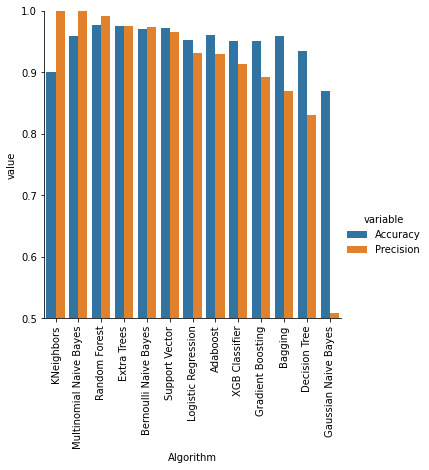

In [301]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.catplot(x="Algorithm",y='value',hue='variable',data=result_table1,kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.ylim(0.5,1.0)
plt.show()

# **Phase 5. Model Improvement**

>> ## **Limiting max_features to 3000 in Tfidf**

In [302]:
tfidf=TfidfVectorizer(max_features=3000)

In [303]:
x=tfidf.fit_transform(data['transformed_messages']).toarray()
y=data['target'].values

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [305]:
accuracy_scores=[]
precision_scores=[]
for name, clf in clfs.items():
  current_accuracy,current_precision=result(clf,x_train,y_train,x_test,y_test)
  #print('For',name)
  #print("Accuracy : ",current_accuracy)
  #print("Precision : ",current_precision,'\n')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [306]:
result_mf_3000=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_mf_3000':accuracy_scores,'Precision_mf_3000':precision_scores,}).sort_values('Precision_mf_3000',ascending=False)

In [307]:
result_mf_3000

,Algorithm,Accuracy_mf_3000,Precision_mf_3000
1,KNeighbors,0.905222,1.000000
4,Multinomial Naive Bayes,0.972921,1.000000
3,Bernoulli Naive Bayes,0.981625,0.991736
7,Extra Trees,0.977756,0.983193
6,Random Forest,0.971954,0.973913
12,Support Vector,0.974855,0.966667
0,Logistic Regression,0.957447,0.951923
11,XGB Classifier,0.946809,0.946237
8,Adaboost,0.964217,0.931624
10,Gradient Boosting,0.948743,0.929293


In [308]:
result2=result1.merge(result_mf_3000,on='Algorithm')

In [309]:
result2

,Algorithm,Accuracy,Precision,Accuracy_mf_3000,Precision_mf_3000
0,KNeighbors,0.900387,1.000000,0.905222,1.000000
1,Multinomial Naive Bayes,0.959381,1.000000,0.972921,1.000000
2,Random Forest,0.976789,0.991379,0.971954,0.973913
3,Extra Trees,0.975822,0.974790,0.977756,0.983193
4,Bernoulli Naive Bayes,0.970986,0.973684,0.981625,0.991736
5,Support Vector,0.972921,0.966102,0.974855,0.966667
6,Logistic Regression,0.952611,0.932039,0.957447,0.951923
7,Adaboost,0.961315,0.929825,0.964217,0.931624
8,XGB Classifier,0.950677,0.914286,0.946809,0.946237
9,Gradient Boosting,0.951644,0.892857,0.948743,0.929293


>> ## **Standard Scaling**

In [310]:
from sklearn.preprocessing import MinMaxScaler

In [311]:
x=MinMaxScaler().fit_transform(x)
y=data['target'].values

In [312]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [313]:
accuracy_scores=[]
precision_scores=[]
for name, clf in clfs.items():
  current_accuracy,current_precision=result(clf,x_train,y_train,x_test,y_test)
  #print('For',name)
  #print("Accuracy : ",current_accuracy)
  #print("Precision : ",current_precision,'\n')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [314]:
result_scaled=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaled':accuracy_scores,'Precision_scaled':precision_scores,}).sort_values('Precision_scaled',ascending=False)

In [315]:
result3=result2.merge(result_scaled,on='Algorithm')

In [316]:
result3

,Algorithm,Accuracy,Precision,Accuracy_mf_3000,Precision_mf_3000,Accuracy_scaled,Precision_scaled
0,KNeighbors,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
1,Multinomial Naive Bayes,0.959381,1.000000,0.972921,1.000000,0.978723,0.939394
2,Random Forest,0.976789,0.991379,0.971954,0.973913,0.971954,0.973913
3,Extra Trees,0.975822,0.974790,0.977756,0.983193,0.977756,0.983193
4,Bernoulli Naive Bayes,0.970986,0.973684,0.981625,0.991736,0.981625,0.991736
5,Support Vector,0.972921,0.966102,0.974855,0.966667,0.970986,0.935484
6,Logistic Regression,0.952611,0.932039,0.957447,0.951923,0.967118,0.964286
7,Adaboost,0.961315,0.929825,0.964217,0.931624,0.964217,0.931624
8,XGB Classifier,0.950677,0.914286,0.946809,0.946237,0.946809,0.946237
9,Gradient Boosting,0.951644,0.892857,0.948743,0.929293,0.948743,0.929293


Our best performing model is Multinomial Naive Bayes with max_features = 3000, with Precision =1 and accuracy = 97.2921%